# Predicting Baldness: A Case Study
## Main Reasons of Balding

---

## 📖 Contents:

1. Data Profiling
2. Data Cleaning
3. Analysis
   - EDA
   - Correlation
4. Machine Learning Model
   - Feature importance analysis

---

## 🧩 Statement of the Problem:

Hair loss affects people of all ages and can lower confidence. Androgenetic alopecia is the most common type, affecting up to 85% of men by age 50 (American Hair Loss Association, n.d.). Since causes are multifactorial, data-driven methods are needed to identify key predictors and support more personalized treatments.


---

## 🚩 Objectives:

1) Perform Exploratory Data Analysis (EDA)
    - What is the age distribution of the surveyed participants?
    - Explore and visualize the lifestyle and stress of the surveyed participants.
    - Explore and visualize the medical conditions of the surveyed participants.
2) Calculate the relationship strength of the features to baldness of the participants.
3) Develop a binary classification model that predicts if someone will go bald and determine its accuracy.
4) Find the three most important features that determine the baldness of a surveyed participant using a machine learning technique.



---


## 📣 Data Profiling:

This dataset focuses on individuals who may be experiencing hair loss. It includes various factors such as age, genetics, stress levels, medical history, and lifestyle habits like smoking and hair care practices. The goal is to understand which of these factors are linked to the presence or absence of baldness.

**Dataset Overview:** 
- Total Observations: 999 rows
- Unit of Analysis: One row per respondent


| **Variable** | **Type** | **Description** |
| :----------- | :--------- | :------------------------------------------------------ |
| Id | Identifier | Unique ID for each individual respondent |
| Genetics | Categorical | Family history of baldness (Yes/No) |
| Hormonal Changes | Categorical | Whether the individual experienced hormonal changes (Yes/No) |
| Medical Conditions | Categorical | Medical history (e.g., alopecia, thyroid issues, scalp infections, etc.) |
| Medications & Treatments | Categorical | Use of medications known to cause hair loss (e.g., chemo, steroids) |
| Nutritional Deficiencies | Categorical | Includes iron, vitamin D, biotin, omega-3 deficiencies |
| Stress | Ordinal | Stress level: Low, Moderate, or High |
| Age | Numeric | Age of the respondent |
| Poor Hair Care Habits | Categorical | Poor hair care practices (Yes/No) |
| Environmental Factors | Categorical | Exposure to harmful environmental factors (Yes/No) |
| Smoking | Categorical | Smoking status (Yes/No) |
| Weight Loss | Categorical | Recent significant weight loss (Yes/No) |
| Hair Loss | Binary | 1 = Hair loss present, 0 = No hair loss |


**Source:**

Dataset owner: Amit Kulkarni

Retrieved from: <https://www.kaggle.com/datasets/amitvkulkarni/hair-health>

---



## 🧽 Data Cleaning:

**Import the necessary libraries:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Get a glimpse of the dataset:**

In [2]:

import os 
import requests

notebook_dir = os.getcwd()
print(notebook_dir)

C:\Users\KimSchool\Github Repos\School-Projects\statistics-and-probability


In [3]:
filename = "hair_dataset.csv"
filepath = os.path.join(notebook_dir, filename)

filepath

'C:\\Users\\KimSchool\\Github Repos\\School-Projects\\statistics-and-probability\\hair_dataset.csv'

In [4]:
if not os.path.exists(filepath):
    print("Downloading CSV...")
    url = "https://drive.google.com/uc?id=1zS1ybGNvnVaVjMmI--HPN7UZWJmOOC_E"
    response = requests.get(url)
    with open(filepath, "wb") as f:
        f.write(response.content)
    print("CSV downloaded successfully.")
else:
    print("CSV already exists.")

hair_df = pd.read_csv('hair_dataset.csv')
hair_df.head()

CSV downloaded successfully.


,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


**Renamed the column names:**
- Makes the dataset consistent
- This to make working with the dataset easier

In [5]:
hair_df.columns = [col.lower().replace(' ', '_') for col in hair_df.columns]
hair_columns = hair_df.columns.to_list()

In [6]:
hair_columns[4] = 'medications_and_treatments'
hair_columns[5] = 'nutritional_deficiencies'
hair_columns[8] = 'poor_hair_care_habits'
hair_columns[11] = 'weight_loss'
hair_df.columns = hair_columns

In [7]:
hair_df.head()

,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


**Validate the category features:**
- This is important to make sure that there are no wrong data values among categorical features

In [8]:
category_df = hair_df.drop(columns = ['id', 'age'])
category_df.head()

,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,No,Yes,Yes,No,1


In [9]:
for i in category_df.columns:
    print(category_df.value_counts(i))
    print("\n")

genetics
Yes    522
No     477
Name: count, dtype: int64


hormonal_changes
Yes    509
No     490
Name: count, dtype: int64


medical_conditions
No Data                  110
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: count, dtype: int64


medications_and_treatments
Rogaine                      116
Antidepressants              110
Steroids                     107
Heart Medication             104
Accutane                     102
Antibiotics                   94
Antifungal Cream              94
Chemotherapy                  90
Blood Pressure Medication     90
Immunomodulators              90
No Data                        2
Name: count, dtype: int64


nutritional_deficiencies
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin De

From the counts above, we can infer that all the values are correct and as expected.

**Validate numerical data:**

In [10]:
print(f"Minimum value: {min(hair_df['age'])}")
print(f"Maximum value: {max(hair_df['age'])}")

Minimum value: 18
Maximum value: 50


In [11]:
print(f"Data type: {hair_df['age'].dtypes}")

Data type: int64


From the result above, it can be concluded that numerical data are all correct as it follows what's stated in the metadata.

**Encode the boolean values:**
- This makes working with Machine Learning easier for future uses

In [12]:
cols_to_convert = ['genetics', 'hormonal_changes', 'poor_hair_care_habits', 'environmental_factors', 'smoking', 'weight_loss']
hair_df[cols_to_convert] = hair_df[cols_to_convert].replace({'Yes': 1, 'No': 0}).astype(int)
hair_df.head()

C:\Users\KimSchool\AppData\Local\Temp\ipykernel_11008\3188962641.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hair_df[cols_to_convert] = hair_df[cols_to_convert].replace({'Yes': 1, 'No': 0}).astype(int)


,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


**Load the dataset as csv:**

In [13]:
hair_df.to_csv("datasets/cleaned_hair.csv")

---
## 🚩 Objective 1: 
### Perform EDA on the Dataset

### 1. Age Distribution by Hair Loss Status
#### What is the age distribution of the surveyed participants?
The following visualizations examine the age distribution of participants based on hair loss status. Together, they provide both a summary and detailed view of age patterns in the dataset.


#### 1.1 Age Distribution Overview

The **boxplot** offers a high-level comparison of age between participants with and without hair loss. It highlights the median, range, and interquartile spread for each group. This allows for quick assessment of differences in central tendency and variability.


| **Without Hair Loss (hair_loss = 0)** | **With Hair Loss (hair_loss = 1)** |
|---|---|
| Sample Size: 502 individuals | Sample Size: 497 individuals |
| Mean Age: 34.77 years | Mean Age: 33.60 years |
| Standard Deviation: 9.59 years | Standard Deviation: 9.13 years |
| 1st Quartile (Q1): 26 years | 1st Quartile (Q1): 26 years |
| 2nd Quartile (Q2): 35 years | 2nd Quartile (Q2): 33 years |
| 3rd Quartile (Q3): 43 years | 3rd Quartile (Q3): 41 years |

In [14]:
result = hair_df.groupby('hair_loss').agg(
    age_count = ('age', 'count'),
    age_mean = ('age', 'mean'),
    age_std = ('age', 'std'),
    minimum_value = ('age', 'min'),
    first_quartile = ('age', lambda x: x.quantile(0.25)),
    second_quartile = ('age', 'median'),   # or: lambda x: x.quantile(0.5)
    third_quartile = ('age', lambda x: x.quantile(0.75)),
    maximum_value = ('age', 'max')
)
result

,age_count,age_mean,age_std,minimum_value,first_quartile,second_quartile,third_quartile,maximum_value
hair_loss,,,,,,,,
0,502,34.770916,9.592356,18,26.0,35.0,43.0,50
1,497,33.599598,9.128266,18,26.0,33.0,41.0,50


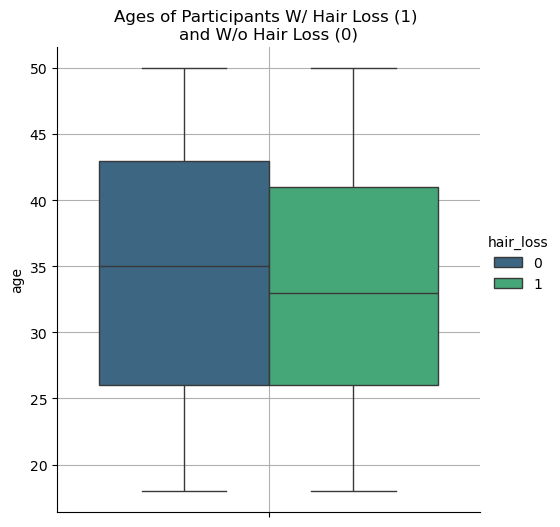

In [15]:
sns.catplot(data = hair_df, y = 'age', hue = 'hair_loss', kind = 'box', palette = 'viridis')
plt.grid()
plt.title("Ages of Participants W/ Hair Loss (1) \nand W/o Hair Loss (0)")
plt.show()


**Observation:**

- Sample Balance: Both groups have very similar sample sizes (502 vs. 497), allowing for balanced comparison.

- Younger Hair Loss Group: Surprisingly, the mean age (33.60 years) and median age (33 years) of individuals with hair loss are slightly lower than those without hair loss (mean 34.77 years, median 35 years). This suggests that in this dataset, hair loss is not exclusively a condition of older age, and affects a significant portion of younger individuals.

- Similar Age Spread: The standard deviations and interquartile ranges are comparable between the groups, indicating similar overall age variability. Both groups also share the same Q1 (26 years), meaning a quarter of both groups are 26 or younger.

#### 1.2 Age Frequency Breakdown

The **histograms** illustrate the number of participants at each age, separated by hair loss status. This gives a more granular look into which specific ages are most common in each group. It helps identify age clusters and possible patterns that may not be visible in the box plot.


| **With Hair Loss** | **Without Hair Loss** |
|---|---|
| Age range: 18 to 50 | Age range: 18 to 50 |
| Most common age: 29 | Most common age: 50 |
| Noticeable peaks: Ages 28, 29, 32 and 35 | Notable peaks: Ages 41, 43, and 50 |

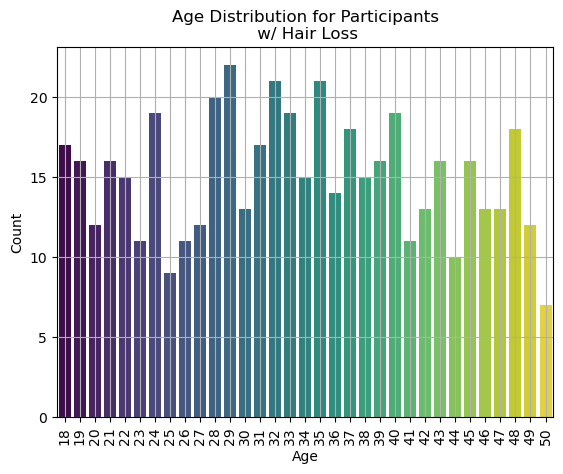

In [16]:
# Count ages manually for hair_loss = 1
age_counts = hair_df[hair_df['hair_loss'] == 1]['age'].value_counts().sort_index()

# Plot
sns.barplot(x=age_counts.index, y=age_counts.values, palette = 'viridis', hue = age_counts.index, legend = False)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution for Participants\n w/ Hair Loss")
plt.grid()
plt.xticks(rotation=90)
plt.show()

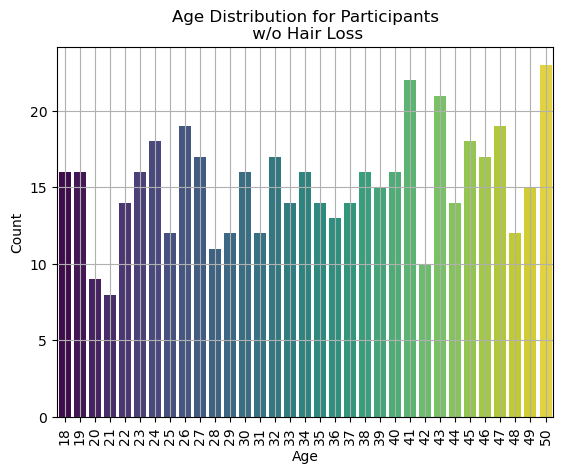

In [17]:
# Count ages manually for hair_loss = 0
age_counts = hair_df[hair_df['hair_loss'] == 0]['age'].value_counts().sort_index()

# Plot
sns.barplot(x=age_counts.index, y=age_counts.values, hue = age_counts.index, legend = False, palette = 'viridis')
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid()
plt.title("Age Distribution for Participants\n w/o Hair Loss")
plt.xticks(rotation=90)
plt.show()

**Observation:**

Hair loss peaks at a younger age (29), while no hair loss peaks at age (50). This shows that hair loss can begin earlier and that age alone is not a strong predictor. Other lifestyle or biological factors likely influence hair loss.

### 2. Lifestyle Factor Distribution by Hair Loss Status
The following pie charts display the distribution of key lifestyle factors among participants, grouped by hair loss status. This breakdown helps identify behavioral and environmental trends that may or may not be linked to hair loss.

**2.1 Poor Hair Care Habits:**
- No Hair Loss Group: 51.2%
- Hair Loss Group: 47.3%

**2.2 Environmental Factors:**
- No Hair Loss Group: 51.8%
- Hair Loss Group: 49.9%

**2.3 Smoking Habits:**
- No Hair Loss Group: 54.8% are smokers
- Hair Loss Group: 49.1% are smokers

**2.4 Weight Loss Patterns:**
- No Hair Loss Group: 45.0% experience weight loss
- Hair Loss Group: 49.5% experience weight loss


**Subset the features that determine the lifestyle of the participants:**

In [18]:
lifestyle_df = hair_df.iloc[:, 8:13]
lifestyle_df.head()

,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,1,0
3,1,1,0,0,0
4,0,1,1,0,1


In [19]:
columns = lifestyle_df.columns.to_list()
del columns[-1]
print(columns)

['poor_hair_care_habits', 'environmental_factors', 'smoking', 'weight_loss']


In [20]:
hair_loss_count = [502, 502, 497, 497]

In [21]:
import numpy as np
pivot = (
    lifestyle_df
    .groupby('hair_loss')[columns]       
    .apply(lambda g: g.apply(pd.Series.value_counts)) 
    .astype(int)
)

percent_cols = [col + "_percent" for col in columns]

for i in range(len(columns)):
    pivot[percent_cols[i]] = pivot[columns[i]] / hair_loss_count

pivot.columns = [col.replace('_', ' ').title() for col in list(pivot.columns)]

In [22]:
pivot

Poor Hair Care Habits  Environmental Factors  Smoking  \
hair_loss                                                            
0         0                    245                    242      227   
          1                    257                    260      275   
1         0                    262                    249      253   
          1                    235                    248      244   

             Weight Loss  Poor Hair Care Habits Percent  \
hair_loss                                                 
0         0          276                       0.488048   
          1          226                       0.511952   
1         0          251                       0.527163   
          1          246                       0.472837   

             Environmental Factors Percent  Smoking Percent  \
hair_loss                                                     
0         0                       0.482072         0.452191   
          1                       0.517928         0.547809   
1         0                       0.501006         0.509054   
          1                       0.498994         0.490946   

             Weight Loss Percent  
hair_loss                         
0         0             0.549801  
          1             0.450199  
1         0             0.505030  
          1             0.494970

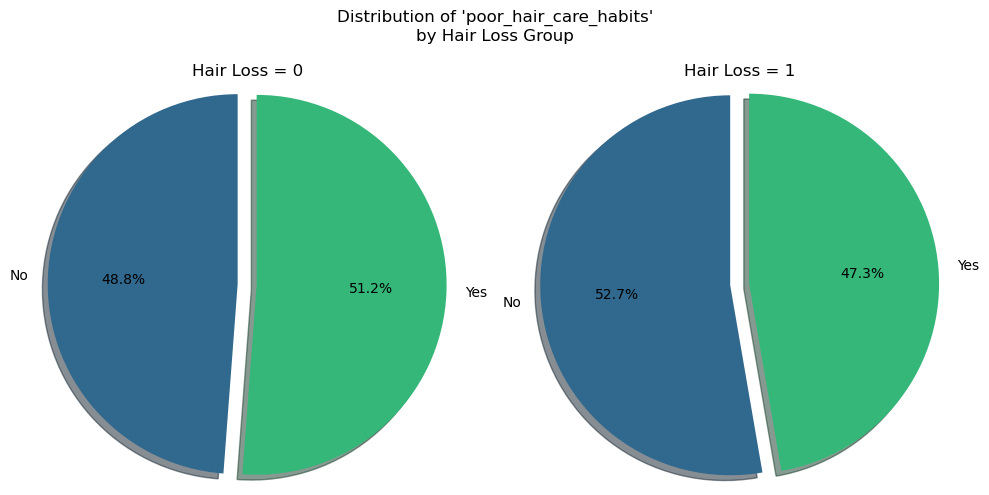

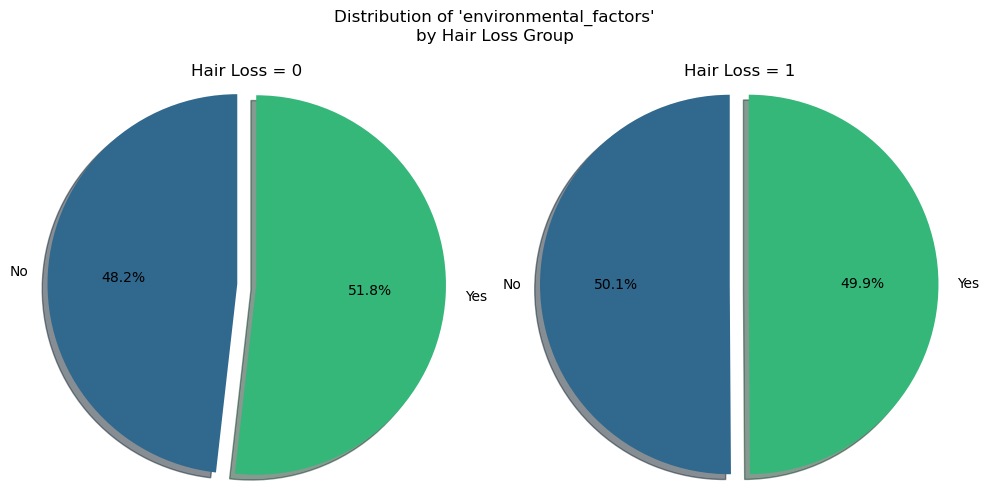

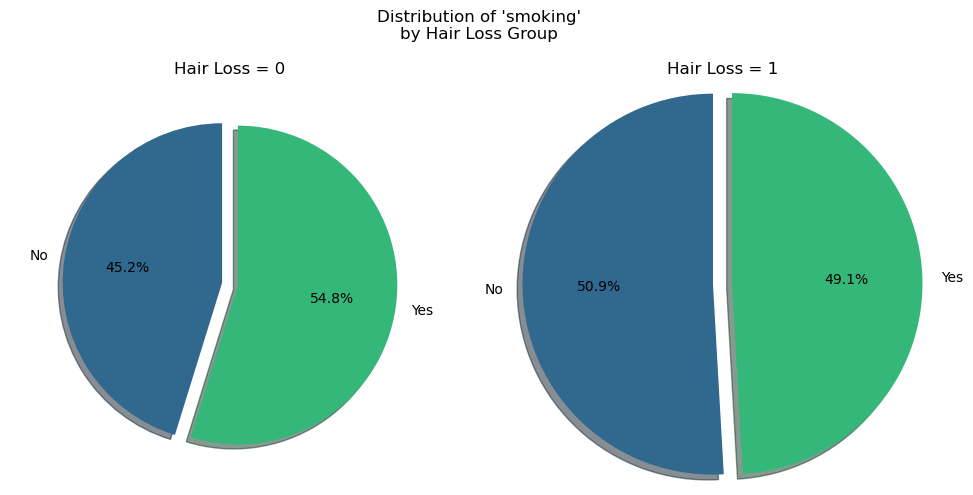

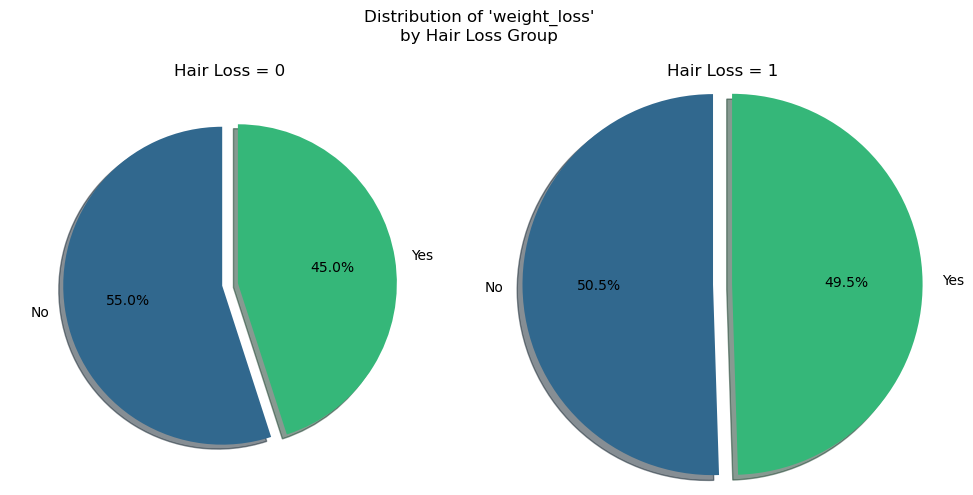

In [23]:
features = ['poor_hair_care_habits', 'environmental_factors', 'smoking', 'weight_loss']

for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Distribution of '{feature}'\nby Hair Loss Group")

    for i, hair_loss_val in enumerate([0, 1]):
        subset = lifestyle_df[lifestyle_df['hair_loss'] == hair_loss_val]
        counts = subset[feature].value_counts().sort_index()
        labels = ['No', 'Yes']
        values = counts.values
        explode = [0.1 if val == max(values) else 0 for val in values]
        colors = sns.color_palette("viridis", 2)

        axes[i].pie(
            values,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            explode=explode,
            colors=colors
        )
        axes[i].set_title(f'Hair Loss = {hair_loss_val}')
        axes[i].axis('equal')  # keeps the pie chart circular

    plt.tight_layout()
    plt.show()


**Observations:**

1. **Poor Hair Care Habits:** A slightly higher percentage of participants without hair loss reported poor hair care habits compared to those with hair loss. The difference between the two groups is minimal. This indicates that poor hair care alone may not directly cause hair loss.
2. **Environmental Factors:** Both groups reported nearly equal levels of exposure to environmental factors. The small difference suggests that environmental exposure may not significantly contribute to hair loss in this sample. If it does have an effect, it is likely to be indirect or combined with other factors.
3. **Smoking Habits:** More participants without hair loss were smokers compared to those with hair loss. This finding goes against the common assumption that smoking increases the risk of hair loss. It suggests the relationship between smoking and hair loss may be more complex and influenced by additional health or genetic factors.
4. **Weight Loss:** The hair loss group reported a slightly higher rate of weight loss compared to those without hair loss. This may point to a possible link between weight loss and hair loss. Nutritional deficiencies or physical stress could be contributing factors.

### 3. Stress Level Distribution by Hair Loss Status

The following bar chart displays the distribution of stress levels (Low, Moderate, and High) among participants, grouped by whether they experienced hair loss or not. This breakdown helps identify potential correlations between stress and hair loss.

- High Stress Levels
    - No Hair Loss Group: 165 participants reported high stress
    - Hair Loss Group: 156 participants reported high stress

- Moderate Stress Levels
    - No Hair Loss Group: 169 participants reported moderate stress
    - Hair Loss Group: 182 participants reported moderate stress

- Low Stress Levels
    - No Hair Loss Group: 168 participants reported low stress
    - Hair Loss Group: 159 participants reported low stress


In [24]:
medical_df = hair_df.iloc[:, 1:7]
medical_df['hair_loss'] = hair_df['hair_loss']

hair_loss_no_df = medical_df[medical_df['hair_loss'].isin([0])]
hair_loss_yes_df = medical_df[medical_df['hair_loss'].isin([1])]

def cross_tab(column):
    pivot = pd.crosstab(index=medical_df[column], columns=medical_df['hair_loss'])
    pivot.columns = ['No Hair Loss', 'Hair Loss']
    pivot = pivot.reset_index()
    return pivot

In [25]:
cross_tab('stress')

,stress,No Hair Loss,Hair Loss
0,High,165,156
1,Low,168,159
2,Moderate,169,182


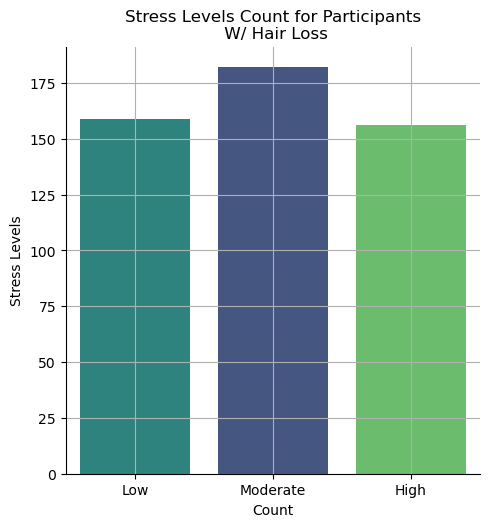

In [26]:
sns.catplot(data = hair_loss_yes_df, x = 'stress', kind = 'count', hue = 'stress', order=['Low', 'Moderate', 'High'], palette = 'viridis')
plt.title('Stress Levels Count for Participants\n W/ Hair Loss')
plt.xlabel('Count')
plt.ylabel('Stress Levels')
plt.grid()
plt.show()

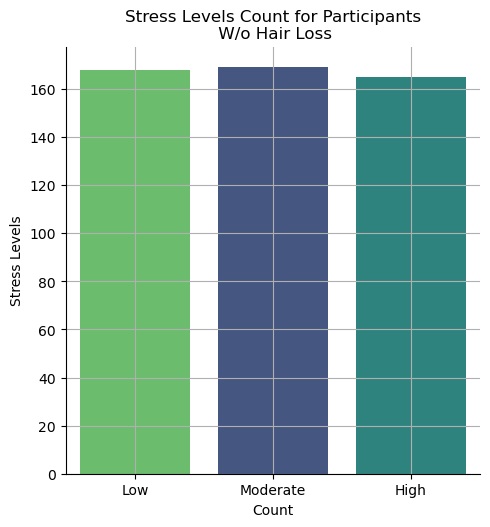

In [27]:
sns.catplot(data = hair_loss_no_df, x = 'stress', kind = 'count', hue = 'stress', order=['Low', 'Moderate', 'High'], palette = 'viridis')
plt.title('Stress Levels Count for Participants\n W/o Hair Loss')
plt.xlabel('Count')
plt.ylabel('Stress Levels')
plt.grid()
plt.show()

**Observation:**

Both groups reported similar levels of high stress, indicating that stress alone may not be the sole cause of hair loss. However, a greater number of participants with hair loss experienced moderate stress levels. This may suggest that ongoing or frequent stress contributes more to hair loss than occasional high stress.


### 4. Medical Conditions Analysis by Hair Loss Status
The following visualizations examine the distribution of selected medical and health-related factors among participants, grouped by hair loss status. This section provides both a summary and detailed view of how genetic, hormonal, and medical conditions, as well as treatment and nutritional deficiencies, relate to hair loss in the study population.

**4.1 Genetic Factor:**
- No Hair Loss Group: 50.2%
- Hair Loss Group: 54.3%

**4.2 Hormonal Changes:**
- No Hair Loss Group: 50.6%
- Hair Loss Group: 51.3%


In [28]:
medical_columns = medical_df.columns.to_list()
del medical_columns[2:]
pivot = (
    medical_df
    .groupby('hair_loss')[medical_columns]        
    .apply(lambda g: g.apply(pd.Series.value_counts))
    .astype(int)
)

percent_cols = [col + "_percent" for col in medical_columns]

for i in range(len(medical_columns)):
    pivot[percent_cols[i]] = pivot[medical_columns[i]] / hair_loss_count

pivot.columns = [col.replace('_', ' ').title() for col in list(pivot.columns)]
pivot

Genetics  Hormonal Changes  Genetics Percent  \
hair_loss                                                   
0         1       252               254          0.501992   
          0       250               248          0.498008   
1         1       270               255          0.543260   
          0       227               242          0.456740   

             Hormonal Changes Percent  
hair_loss                              
0         1                  0.505976  
          0                  0.494024  
1         1                  0.513078  
          0                  0.486922

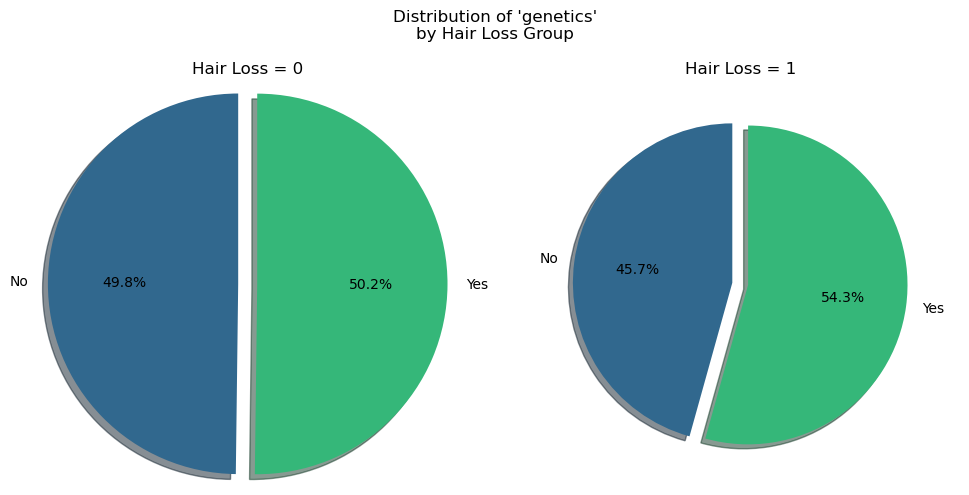

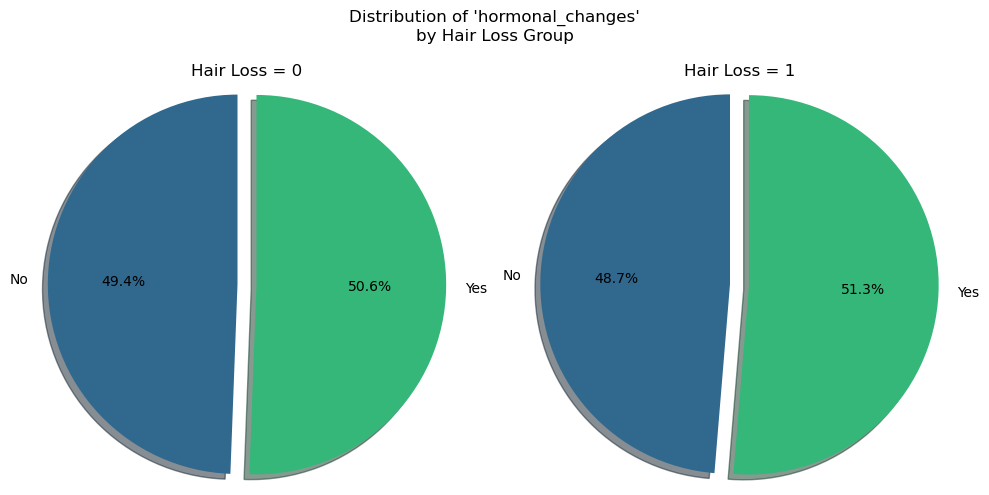

In [29]:
features = ['genetics', 'hormonal_changes']

for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Distribution of '{feature}'\nby Hair Loss Group")

    for i, hair_loss_val in enumerate([0, 1]):
        subset = medical_df[medical_df['hair_loss'] == hair_loss_val]
        counts = subset[feature].value_counts().sort_index()  # [0s, 1s]
        labels = ['No', 'Yes']
        values = counts.values
        explode = [0.1 if val == max(values) else 0 for val in values]
        colors = sns.color_palette("viridis", 2)

        axes[i].pie(
            values,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            explode=explode,
            colors=colors
        )
        axes[i].set_title(f'Hair Loss = {hair_loss_val}')
        axes[i].axis('equal') 

    plt.tight_layout()
    plt.show()

**Observation:**

**Genetics:** A higher proportion of individuals with hair loss reported genetic factors. This supports the idea that heredity plays a key role in conditions like androgenetic alopecia. However, not all hair loss cases had genetic links, indicating other contributing factors.

**Hormonal Changes:**
The difference between groups is minimal. This suggests hormonal changes affect both groups similarly. Hormonal imbalance alone may not be a strong distinguishing factor for hair loss in this dataset.

### 4.3 Medical Conditions

- **Most Common:** Alopecia Areata (61 cases)
- **Least Common:** Eczema and Ringworm (33 cases)


In [30]:
def cross_tab(column):
    pivot = pd.crosstab(index=medical_df[column], columns=medical_df['hair_loss'])
    pivot.columns = ['No Hair Loss', 'Hair Loss']
    pivot = pivot.reset_index()
    return pivot
cross_tab('medical_conditions')

,medical_conditions,No Hair Loss,Hair Loss
0,Alopecia Areata,46,61
1,Androgenetic Alopecia,43,55
2,Dermatitis,48,44
3,Dermatosis,45,43
4,Eczema,36,33
5,No Data,63,47
6,Psoriasis,50,50
7,Ringworm,36,33
8,Scalp Infection,41,38
9,Seborrheic Dermatitis,38,50


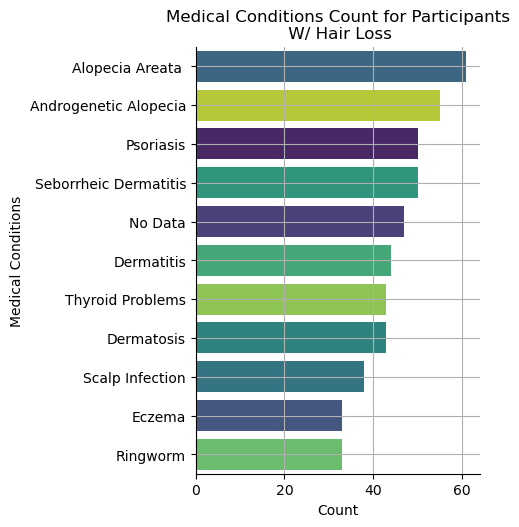

In [31]:
sns.catplot(data = hair_loss_yes_df, palette = 'viridis', y = 'medical_conditions', kind = 'count', hue = 'medical_conditions',
           order = hair_loss_yes_df['medical_conditions'].value_counts().index)
plt.grid()
plt.ylabel("Medical Conditions")
plt.xlabel('Count')
plt.title('Medical Conditions Count for Participants\n W/ Hair Loss')
plt.show()

**Observation:**

Alopecia areata is the most frequently reported condition among those with hair loss. This implies that inflammation and immune-related disorders are major contributors. In contrast, infectious causes like eczema and ringworm appear less influential.


In [32]:
#sns.catplot(data = hair_loss_no_df, palette = 'viridis', y = 'medical_conditions', kind = 'count', hue = 'medical_conditions',
#         order = hair_loss_no_df['medical_conditions'].value_counts().index)
#plt.grid()
#plt.ylabel("Medical Conditions")
#plt.xlabel('Count')
#plt.title('Medical Conditions Count for Participants\n W/o Hair Loss')
#plt.show()


### 4.4 Medications and Treatments
- **Most Common:** Steroids and Rogaine (59 cases)
- **Least Common:** No Data (1 case)


In [33]:
cross_tab('medications_and_treatments')

,medications_and_treatments,No Hair Loss,Hair Loss
0,Accutane,52,50
1,Antibiotics,44,50
2,Antidepressants,57,53
3,Antifungal Cream,50,44
4,Blood Pressure Medication,48,42
5,Chemotherapy,44,46
6,Heart Medication,51,53
7,Immunomodulators,50,40
8,No Data,1,1
9,Rogaine,57,59


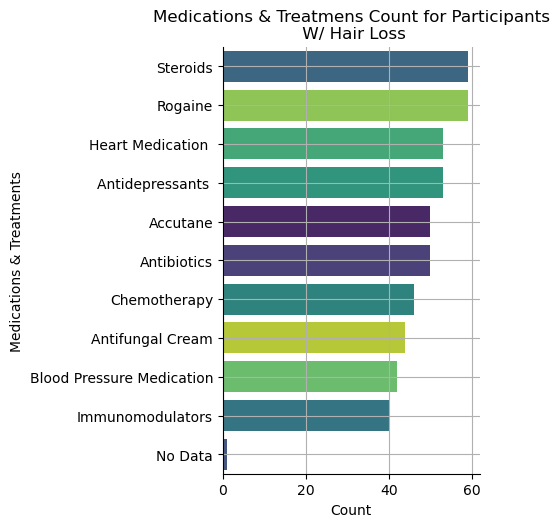

In [34]:
sns.catplot(data = hair_loss_yes_df, y = 'medications_and_treatments', kind = 'count', hue = 'medications_and_treatments', \
            order= hair_loss_yes_df['medications_and_treatments'].value_counts().index, palette = 'viridis')
plt.grid()
plt.title('Medications & Treatmens Count for Participants\n W/ Hair Loss')
plt.xlabel('Count')
plt.ylabel('Medications & Treatments')
plt.show()

**Observation:**

Steroids and Rogaine were the most frequently used treatments for hair loss. Their usage reflects a combination of systemic and topical approaches. The low number of missing entries suggests that treatment information was mostly complete and well-documented.


In [35]:
# sns.catplot(data = hair_loss_no_df, y = 'medications_and_treatments', kind = 'count', hue = 'medications_and_treatments', \
#            order= hair_loss_no_df['medications_and_treatments'].value_counts().index, palette = 'viridis')
# plt.grid()
# plt.title('Medications & Treatmens Count for Participants\n W/o Hair Loss')
# plt.xlabel('Count')
# plt.ylabel('Medications & Treatments')
# plt.show()

### 4.5 Nutritional Deficiencies
- Most Common: Vitamin D Deficiency (52 cases)
- Least Common: Vitamin E Deficiency (38 cases)


In [36]:
cross_tab('nutritional_deficiencies')

,nutritional_deficiencies,No Hair Loss,Hair Loss
0,Biotin Deficiency,53,46
1,Iron deficiency,38,40
2,Magnesium deficiency,38,46
3,No Data,38,42
4,Omega-3 fatty acids,50,42
5,Protein deficiency,43,47
6,Selenium deficiency,40,42
7,Vitamin A Deficiency,48,51
8,Vitamin D Deficiency,52,52
9,Vitamin E deficiency,45,38


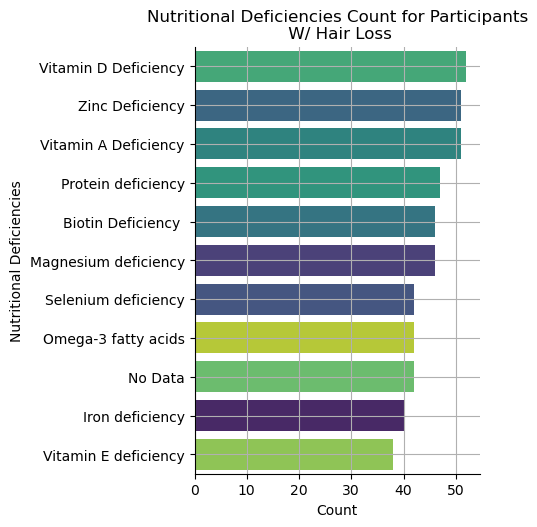

In [37]:
sns.catplot(data = hair_loss_yes_df, y = 'nutritional_deficiencies', kind = 'count', hue = 'nutritional_deficiencies',\
            order= hair_loss_yes_df['nutritional_deficiencies'].value_counts().index, palette = 'viridis')
plt.grid()
plt.title('Nutritional Deficiencies Count for Participants\n W/ Hair Loss')
plt.xlabel('Count')
plt.ylabel('Nutritional Deficiencies')
plt.show()

**Observation:**

Vitamin D deficiency was the most common nutritional issue reported. This highlights a possible connection between low vitamin D levels and hair loss. It suggests that nutrition plays a meaningful role in hair health.


In [38]:
#sns.catplot(data = hair_loss_no_df, y = 'nutritional_deficiencies', kind = 'count', hue = 'nutritional_deficiencies',\
#            order= hair_loss_no_df['nutritional_deficiencies'].value_counts().index, palette = 'viridis')
#plt.grid()
#plt.title('Nutritional Deficiencies Count for Participants\n W/o Hair Loss')
#plt.xlabel('Count')
#plt.ylabel('Nutritional Deficiencies')
#plt.show()

---

## 🚩 Objective 4:
### Calculate the relationship of the features to baldness of the participants

In [39]:
from scipy.stats import pointbiserialr, mannwhitneyu, chi2_contingency
hair_correlation_df = hair_df.copy()
hair_correlation_df = hair_df.copy()
hair_correlation_df.head()

,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


| Variable | Level of Measurement | Measure of Association |
|---|---|---|
| Age | Continuous | Point-biserial correlation |
| Stress | Ordinal | Rank-biserial correlation |
| Medical Conditions | Nominal (>2 categories) | Cramer's V |
| Medications & Treatments | Nominal (>2 categories) | Cramer's V |
| Nutritional Deficiencies | Nominal (>2 categories) | Cramer's V |
| Genetics | Nominal (binary) | Phi (φ) coefficient |
| Hormonal Changes | Nominal (binary) | Phi (φ) coefficient |
| Poor Hair Care Habits | Nominal (binary) | Phi (φ) coefficient |
| Environmental Factors | Nominal (binary) | Phi (φ) coefficient |
| Smoking | Nominal (binary) | Phi (φ) coefficient |
| Weight Loss | Nominal (binary) | Phi (φ) coefficient |

**4.1. Age:**

Using the formula:
$$r_{pb} = \frac{\overline{Y}_1 - \overline{Y}_0}{s_y} \sqrt{\frac{N_0 N_1}{N(N-1)}}$$
We can calculate the correlation of **continuous - nominal (0/1)**.


In [40]:
results = {}

# Age - hair_loss  (point-biserial = Pearson on [0/1] x continuous)
r_age, _ = pointbiserialr(hair_correlation_df["hair_loss"], hair_correlation_df["age"])
results["Age"] = r_age

**4.2. Stress:**

Using the formula **(rank-biserial correlation)**:
$$r_{rb} = 1 - \frac{2U}{n_1 n_2}$$
We can calculate the correlation of **ordinal - nominal (0/1)**.


In [41]:
def rank_biserial(x, g):
    """
    Rank-biserial correlation (ordinal vs binary)
    x : ordinal numeric series
    g : binary group labels (0/1)
    """
    u, _  = mannwhitneyu(x[g == 0], x[g == 1], alternative="two-sided")
    n1, n2 = (g == 0).sum(), (g == 1).sum()
    return 1 - (2 * u) / (n1 * n2)

stress_map = {"Low": 0, "Moderate": 1, "High": 2}
hair_correlation_df["stress_rank"] = hair_correlation_df["stress"].map(stress_map)

# Stress (ordinal) - hair_loss  (rank‑biserial)
results['Stress'] = rank_biserial(hair_correlation_df["stress_rank"], hair_correlation_df["hair_loss"])

**4.3. Medical Conditions, Medications and Treatments, & Nutritional Deficiencies:**

Using the formula:
$$V = \sqrt{\frac{\chi^2}{n \cdot \min(r-1, c-1)}} \, ; \, \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$
We can calculate the correlation of **Nominal > 2 - nominal (0/1)**.

In [42]:
def cramers_v(table: pd.DataFrame) -> float:
    """Cramér’s V for nominal×binary (or nominal×nominal)"""
    chi2 = chi2_contingency(table, correction=False)[0]
    n    = table.to_numpy().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

nominal_multi = [
    "medical_conditions",
    "medications_and_treatments",
    "nutritional_deficiencies",
]
for col in nominal_multi:
    results[col] = cramers_v(pd.crosstab(hair_correlation_df[col], hair_correlation_df["hair_loss"]))

**4.4. Genetics, Hormonal Changes, Poor Hair Care Habits, Environmental Factors, Smoking & Weight Loss:**

Using the formula:
$$\phi = \frac{ad-bc}{\sqrt{(a+b)(c+d)(a+c)(b+d)}}$$
We can calculate the correlation of **nominal (0/1) - nominal (0/1)**.

In [43]:
# Binary - hair_loss  (φ)
def phi_coeff(table: np.ndarray) -> float:
    (a, b), (c, d) = table
    return (a*d - b*c) / np.sqrt((a+b)*(c+d)*(a+c)*(b+d))

binary_cols = [
    "genetics", "hormonal_changes", "poor_hair_care_habits",
    "environmental_factors", "smoking", "weight_loss"
]
for col in binary_cols:
    results[col] = phi_coeff(pd.crosstab(hair_correlation_df[col], hair_correlation_df["hair_loss"]).to_numpy())

In [44]:
corr = (
    pd.Series(results, name="Correlation with Hair Loss")
      .sort_values(key=abs, ascending=False)
      .to_frame()
)
corr.index = [idx.replace('_', ' ').title() for idx in corr.index]
corr.reset_index(inplace = True)
corr.columns = ['Feature', 'Correlation with Hair Loss']
corr

,Feature,Correlation with Hair Loss
0,Medical Conditions,0.099107
1,Age,-0.062481
2,Medications And Treatments,0.060735
3,Nutritional Deficiencies,0.058510
4,Smoking,-0.056906
5,Weight Loss,0.044838
6,Genetics,0.041309
7,Poor Hair Care Habits,-0.039119
8,Environmental Factors,-0.018937
9,Hormonal Changes,0.007104


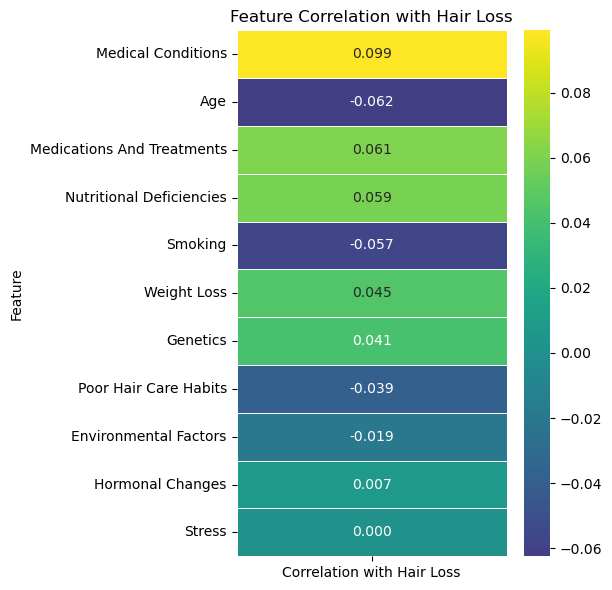

In [45]:
# Set figure size and plot heatmap
corr.set_index('Feature', inplace=True)
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='viridis', center=0, cbar=True, linewidths=0.5, fmt=".3f")

plt.title('Feature Correlation with Hair Loss')
plt.tight_layout()
plt.show()

**4.4. Correlation Results:**

| **Variable** | **Correlation/Association Strength** | **Implication/Note** |
|---|---|---|
| **Medical Conditions** | Strongest positive association (Cramér’s V = 0.099) | Suggests some influence of underlying health issues on hair loss; effect size is weak. |
| **Age** | Weak negative correlation (r = –0.062) | Implies slightly more hair loss among younger individuals; may reflect sampling bias or dataset-specific trends. |
| **Medications & Treatments** | Weakly positively associated (Cramér’s V = 0.061) | Possible influence from side effects of certain medications. |
| **Nutritional Deficiencies** | Weakly associated (Cramér’s V = 0.059) | Aligns with existing knowledge on hair health and nutrient deficiencies. |
| **Smoking** | Weak negative correlation (φ = –0.057) | Unexpected; may be due to confounding variables or reporting bias. |
| **Weight Loss** | Weak positive association (φ = 0.045) | Could indicate stress or nutritional changes impacting hair health. |
| **Genetics** | Very weak correlation (φ = 0.041) | Likely underestimates the role due to binary simplification of data. |
| **Poor Hair Care Habits** | Weak negative correlation (φ = –0.039) | Suggests limited impact in isolation. |
| **Environmental Factors** | Very minimal association (φ = –0.019) | May contribute indirectly or in interaction with other factors. |
| **Hormonal Changes** | Extremely weak positive correlation (φ = 0.007) | Likely underrepresented in binary format. |
| **Stress** | No meaningful association found (r = 0.00005) | Suggests that self-reported stress levels may not accurately reflect hair-related stress effects. |

**Implications:**
* Our dataset shows a **complex and fragmented picture of hair loss**, not a simple one.
* **Medical conditions, treatments, and nutritional deficiencies** are seen more often in individuals with hair loss, but their impact is generally **modest**.
* Surprisingly, factors commonly thought to be major contributors, like **genetics, stress, and hormonal changes**, show **little to no association** in our data.
    * This could be due to **oversimplified data encoding**, **inaccurate self-reporting**, or **limitations in the dataset's size or representativeness**.
* The **weak inverse relationship with age** (more hair loss in younger individuals) likely stems from **sampling biases or specific trends** within this dataset, rather than a direct biological link.
* Overall, the **absence of strong, clear patterns** suggests that hair loss in this sample is probably caused by a **combination of many minor, interacting factors**, rather than one dominant cause.
    * This complexity also made it **difficult for machine learning models to predict hair loss with high accuracy**.

---

## 🚩 Objective 3:
### Create a Model that Predicts if a person will go bald and evaulate its accuracy

**Import the cleaned dataset from the previous notebook:**

In [46]:
df = hair_df.copy()
hair_df.head()

,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


**Preprocess data by encoding categorical data into numerical data:**
- This is important because machine learning models use numbers thus the need for preprocessing

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

X = hair_df.drop(['hair_loss', 'id'], axis = 1)
y = hair_df['hair_loss']

ordinal_cols = ['stress']
nominal_cols = ['medical_conditions', 'medications_and_treatments', 'nutritional_deficiencies']

preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(categories=[['Low', 'Moderate', 'High']]), ordinal_cols),
    ('nominal', OneHotEncoder(drop='first', sparse_output=False), nominal_cols)
], remainder='passthrough')

# Fit and transform
X_cat_encoded = preprocessor.fit_transform(X)

# Get feature names
column_names = preprocessor.get_feature_names_out()

# Create dataframe
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=column_names)

In [48]:
X_cat_encoded_df.head()

,ordinal__stress,nominal__medical_conditions_Androgenetic Alopecia,nominal__medical_conditions_Dermatitis,nominal__medical_conditions_Dermatosis,nominal__medical_conditions_Eczema,nominal__medical_conditions_No Data,nominal__medical_conditions_Psoriasis,nominal__medical_conditions_Ringworm,nominal__medical_conditions_Scalp Infection,nominal__medical_conditions_Seborrheic Dermatitis,...,nominal__nutritional_deficiencies_Vitamin D Deficiency,nominal__nutritional_deficiencies_Vitamin E deficiency,nominal__nutritional_deficiencies_Zinc Deficiency,remainder__genetics,remainder__hormonal_changes,remainder__age,remainder__poor_hair_care_habits,remainder__environmental_factors,remainder__smoking,remainder__weight_loss
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,46.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0


The above table shows the first five rows of a transformed hair dataset (`hair_df`). What happened:
1. The nominal data `['medical_conditions', 'medications_and_treatments', 'nutritional_deficiencies']` have been transformed to have their own columns for each of their value while dropping the last value to avoid redundancy.
2. The ordinal data `['stress']` has also been transformed to represent each of its value with corresponding numerical values

In [49]:
# copy the dataset for future use
ml_hair_df = X_cat_encoded_df.copy()
ml_hair_df['hair_loss'] = y
ml_hair_df.head()

,ordinal__stress,nominal__medical_conditions_Androgenetic Alopecia,nominal__medical_conditions_Dermatitis,nominal__medical_conditions_Dermatosis,nominal__medical_conditions_Eczema,nominal__medical_conditions_No Data,nominal__medical_conditions_Psoriasis,nominal__medical_conditions_Ringworm,nominal__medical_conditions_Scalp Infection,nominal__medical_conditions_Seborrheic Dermatitis,...,nominal__nutritional_deficiencies_Vitamin E deficiency,nominal__nutritional_deficiencies_Zinc Deficiency,remainder__genetics,remainder__hormonal_changes,remainder__age,remainder__poor_hair_care_habits,remainder__environmental_factors,remainder__smoking,remainder__weight_loss,hair_loss
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0,0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26.0,1.0,1.0,0.0,1.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,46.0,1.0,1.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.0,0.0,1.0,1.0,0.0,1


**Preprocess data by scaling numerical data:**
- This is important because features on a larger scale can disproportionately influence the model hence the normalization or standardization of the features (numerical)


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

X = ml_hair_df.drop('hair_loss', axis = 1)
y = ml_hair_df['hair_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scale_cols = ['remainder__age', 'ordinal__stress']
rest_cols = [col for col in X.columns if col not in scale_cols]

preprocessor = ColumnTransformer(transformers=[
    ('scale', StandardScaler(), scale_cols)
], remainder='passthrough')

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

**The above table shows the first five rows of a scaled hair dataset (hair_df). What happened:**
1. The datasets are splitted into training and testing 
2. The columns `['ordinal__stress', 'remainder__age']` have been scaled which means transforming features to be on the same scale or range. This is done to ensure that no feature dominates another due to differences in their units or magnitude
3. This also makes the use of some machine learning models possible for some of them performs best when data are scaled

**Keep the dataframe for models that do not need scaling:**
- Models that need scaling include:
  - Decision Tree Classifier
  - Random Forest Classifier

**Scale the dataframe for models that need scaling:**
- Models that need scaling include:
  - Logistic Regression`
  - KNN

**Evaluate the better model that uses scaled data:**
- This is important so that for future use only one model can be used for prediction or for fine tuning

In [51]:
# Train the dataset
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

models = {"KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression()}
results = []

for model in models.values():
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    results.append(cross_val_score(model, X_train_scaled, y_train, cv = kf, scoring = 'accuracy'))

scaled_scores = []
for i in range(2):
    print(f"Accuracy mean from all the folds ({list(models.keys())[i]}): {results[i].mean()}")
    scaled_scores.append(results[i].mean())

scaled_prediction_scores = []
print("\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = round(model.score(X_test_scaled, y_test), 2)
    print(name + " against testing dataset: " + str(test_score))
    scaled_prediction_scores.append(test_score)

Accuracy mean from all the folds (KNN): 0.5106761006289308
Accuracy mean from all the folds (Logistic Regression): 0.47061320754716973


KNN against testing dataset: 0.51
Logistic Regression against testing dataset: 0.47


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models_unscaled = {"DTC": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier()}

for model in models_unscaled.values():
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    results.append(cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy'))

unscaled_scores =[]
for i in range(2, 4):
    print(f"Accuracy mean from all the folds ({list(models_unscaled.keys())[i - 2]}): {results[i].mean()}")
    unscaled_scores.append(results[i].mean())
    
print("\n")

unscaled_prediction_scores = []
for name, model in models_unscaled.items():
    model.fit(X_train, y_train)
    test_score = round(model.score(X_test, y_test), 2)
    unscaled_prediction_scores.append(test_score)
    print(name + " against testing dataset: " + str(test_score))

Accuracy mean from all the folds (DTC): 0.47945754716981126
Accuracy mean from all the folds (Random Forest): 0.5206996855345911


DTC against testing dataset: 0.47
Random Forest against testing dataset: 0.5


In [53]:
scaled_model_name = list(models.keys())
unscaled_model_name = list(models_unscaled.keys())

models_names = pd.Series(scaled_model_name + unscaled_model_name) 
prediction_scores = pd.Series(scaled_prediction_scores + unscaled_prediction_scores)
scores = list(scaled_scores + unscaled_scores)
scores = pd.Series([round(float(score), 2) for score in scores])

print(models_names)
print(scores)
print(prediction_scores)

0                    KNN
1    Logistic Regression
2                    DTC
3          Random Forest
dtype: object
0    0.51
1    0.47
2    0.48
3    0.52
dtype: float64
0    0.51
1    0.47
2    0.47
3    0.50
dtype: float64


In [54]:
df_scores = pd.DataFrame({
    'Model': models_names,
    'Score': scores,
    'Prediction Score': prediction_scores
})

df_scores

,Model,Score,Prediction Score
0,KNN,0.51,0.51
1,Logistic Regression,0.47,0.47
2,DTC,0.48,0.47
3,Random Forest,0.52,0.50


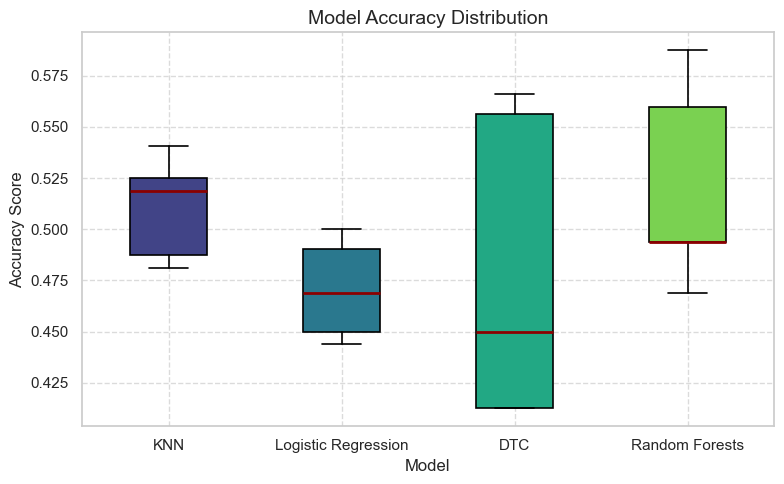

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.boxplot(results, tick_labels = ['KNN', 'Logistic Regression', 'DTC', 'Random Forests'])
# plt.show()

# Optional: Set global Seaborn style
sns.set(style="whitegrid")

# Define colors using viridis palette
colors = sns.color_palette("viridis", len(results))

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 5))
box = ax.boxplot(
    results,
    patch_artist=True,  # allows color fill
    tick_labels=['KNN', 'Logistic Regression', 'DTC', 'Random Forests']
)

# Style each box with viridis colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

# Style whiskers, caps, medians
for whisker in box['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.2)

for cap in box['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.2)

for median in box['medians']:
    median.set_color('darkred')
    median.set_linewidth(2)

# Add title and axis labels
ax.set_title("Model Accuracy Distribution", fontsize=14)
ax.set_ylabel("Accuracy Score", fontsize=12)
ax.set_xlabel("Model", fontsize=12)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Observation:**

Four machine learning models were evaluated to identify key features determining baldness: KNN, Logistic Regression, Decision Tree Classifier (DTC), and Random Forest. Based on both cross-validation accuracy and testing accuracy, KNN and Random Forest consistently achieved the highest performance (both 0.51), while Logistic Regression had the lowest accuracy (0.47). Although DTC showed a wider range of accuracy scores, its performance was unstable with high variance across folds, suggesting inconsistency.


---

## 🚩 Objective 4
### Get the Feature importance

Given that the highest model for accuracy is the Random Forest Classifier, it has been used as the model to determine the feature importance which uses impurity reduction, typically **Gini importance.**

In [56]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_  # array of importance scores

In [57]:
import numpy as np
feature_names = np.array(ml_hair_df.columns)
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_names = feature_names[sorted_indices]

In [58]:
# Used if want to see the importances of all the features
# plt.figure(figsize=(10, 6))
#
# sns.barplot(x=sorted_importances, y=sorted_names, palette='viridis', hue = sorted_importances, legend = False)
#
#
# plt.xlabel("Importance Score", fontsize=12)
# plt.ylabel("Feature", fontsize=12)
# plt.title("Feature Importance", fontsize=14)
#
# plt.xticks(rotation=45, ha='right')
# # plt.tight_layout()
#
# # plt.show()

In [59]:
import re
regex = r'\w+__'

sorted_importances_10 = sorted_importances[:11]
sorted_names_10 = sorted_names[:11]

sorted_names_10 = [re.sub(regex, '', label).replace('_', ' ').title() for label in sorted_names_10]

importance_df = {
'Feature': sorted_names_10,
'Absolute Mean Decrease Gini (Importance)': sorted_importances_10 
}

pd.DataFrame(importance_df)

,Feature,Absolute Mean Decrease Gini (Importance)
0,Age,0.165199
1,Stress,0.060636
2,Hormonal Changes,0.040973
3,Environmental Factors,0.040756
4,Weight Loss,0.040346
5,Smoking,0.039371
6,Genetics,0.036882
7,Poor Hair Care Habits,0.033283
8,Nutritional Deficiencies Vitamin D Deficiency,0.022483
9,Medications And Treatments Rogaine,0.021235


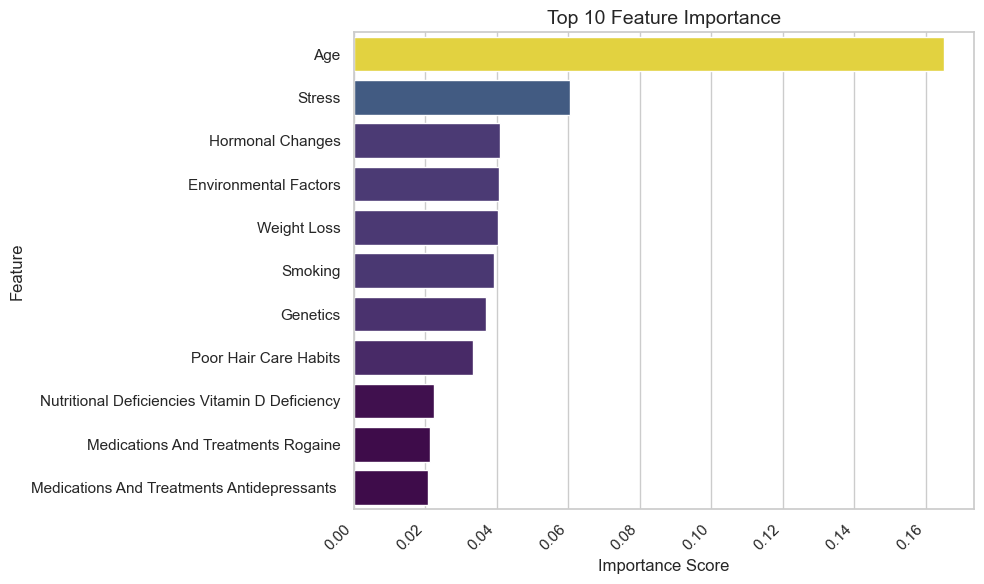

In [60]:
plt.figure(figsize=(10, 6))

sns.barplot(x=sorted_importances_10, y=sorted_names_10, palette='viridis', hue = sorted_importances_10, legend = False)

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Feature Importance", fontsize=14)

plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

plt.show()

### Observations:


Our **Random Forest model** identified **Age as the overwhelmingly most important factor in predicting hair loss**, with an importance score of 0.167. This score is significantly higher than any other feature, strongly suggesting that **age-related biological processes are fundamental to hair loss progression** within our dataset.

**Stress** emerged as the **second most influential feature**, with an importance score of 0.062. This finding aligns with extensive research linking psychological stress to various hair shedding conditions, such as telogen effluvium. The prominence of both Age and Stress indicates that **both chronological maturation and an individual's psychological state are primary contributors** to hair loss at least in prediction models like Random Forest Classifier.

The analysis further showed that several other variables, including **Hormonal Changes, Environmental Factors, Weight Loss, Genetics, and Poor Hair Care Habits**, exert a **moderate, albeit lesser, influence** on hair loss prediction, with importance scores ranging from approximately 0.036 to 0.045. Their collective presence underscores the **multifactorial nature of hair loss**, suggesting that these diverse lifestyle and health-related factors contribute smaller, but still meaningful, effects.

Interestingly, factors like **nutritional deficiencies (specifically Vitamin D and Zinc) and chemotherapy treatments** appeared at the lower end of our top 10 most important features. While their overall importance in the general dataset seems relatively low, their inclusion among the top predictors implies they can still play a **significant role, particularly in specific subpopulations or individual cases** where these factors are more pronounced.

---

## 5. Conclusion and Recommendation

### Conclusion

#### Objective 1 – Factors Associated with Hair Loss

- **Age-related trends**:
  - Participants with hair loss were slightly younger on average than those without.
  - Hair loss peaked at age **29**, whereas no hair loss peaked at age **50**.
  - This indicates that hair loss may begin earlier and that age alone is **not a strong predictor**.

- **Hair care habits**:
  - Slightly more participants **without** hair loss reported **poor hair care habits**.
  - The minimal difference suggests poor hair care **does not directly cause hair loss**.

- **Environmental exposure**:
  - Both groups had nearly equal exposure to environmental factors.
  - Indicates **limited or indirect influence** of environment on hair loss.

- **Smoking habits**:
  - More **non-hair loss** participants were **smokers**.
  - Contradicts the assumption that smoking increases hair loss risk, **relationship may be more complex**.

- **Weight loss**:
  - Slightly more participants with hair loss experienced **weight loss**.

- **Stress levels**:
  - Both groups experienced similar **high stress** levels.
  - However, **moderate stress** was more common among the hair loss group.

- **Hormonal changes**:
  - Both groups reported similar experiences with hormonal imbalance.
  - Suggests hormones **may influence** but are **not a distinguishing factor**.

- **Medical conditions**:
  - **Alopecia Areata** was the most common among hair loss participants.
    
- **Treatments used**:
  - **Steroids and Rogaine** were the most reported treatments.
  - Reflects use of both **topical and systemic approaches**.

- **Nutritional deficiencies**:
  - **Vitamin D deficiency** was the most reported.
  - Emphasizes a potential link between **nutrition and hair health**.


#### Objective 2 - Creation and Evaluating ML Models to Identify Key Features

- **Models Evaluated**:
  - Four models were tested: **KNN**, **Logistic Regression**, **Decision Tree Classifier (DTC)**, and **Random Forest**.

- **Top-performing models**:
  - **KNN** and **Random Forest** both achieved the highest **cross-validation and testing accuracy** of **0.51**.
  - These models were the **most consistent** in performance across the dataset.

- **Lowest-performing model**:
  - **Logistic Regression** had the **lowest accuracy** at **0.47**.
  - Indicates it may not capture the underlying patterns in the data effectively.

- **Decision Tree Classifier (DTC)**:
  - Displayed **high variance** across cross-validation folds.
  - While capable of higher scores at times, it was generally **unstable and inconsistent**.


#### Conclusion: Objective 3 – Identifying Key Predictive Features Using Random Forest

- **Top feature: Age**
  - Had the highest importance score: **0.167**.
  - Strongly suggests that **age-related biological processes** are key in hair loss prediction.
  
- **Second most important: Stress**
  - Importance score: **0.062**.
  - Supports the established link between **psychological stress and hair shedding conditions** like telogen effluvium.
  - Highlights the role of **both biological aging and psychological health** in hair loss.

- **Moderate contributing factors** (importance scores ~0.036 to 0.045):
  - **Hormonal Changes**
  - **Environmental Factors**
  - **Weight Loss**
  - **Genetics**
  - **Poor Hair Care Habits**
  - These factors contribute **smaller but meaningful effects**, reinforcing that hair loss is **multifactorial**.

- **Lower-ranked but notable predictors**:
  - **Nutritional deficiencies** (Vitamin D, Zinc)
  - **Chemotherapy treatments**
  - Though their importance scores are lower, their appearance in the **top 10 features** suggests they may play **critical roles in specific cases or subpopulations**.


#### Objective 4 - Strength of Association Between Features and Hair Loss

- **Medical conditions** showed the **strongest positive association** (Cramér’s V = 0.099), but the effect size remains **weak**, highlighting modest influence.
- **Age** had a **slight negative correlation** (r = –0.062), indicating more hair loss among younger individuals—likely due to **sampling bias** rather than biology.
- **Medications, nutritional deficiencies, and weight loss** were weakly associated with hair loss, aligning with prior knowledge but showing only **modest impact**.
- **Surprisingly weak or no association** was found for **genetics**, **stress**, **hormonal changes**, and **environmental factors**, possibly due to **binary encoding**, **self-reporting issues**, or **dataset limitations**.

Overall, the results reveal a **fragmented and complex picture**, where no single factor shows strong influence. Hair loss in this dataset appears to result from a **blend of many small, interacting factors**, making high prediction accuracy difficult for machine learning models.


### Recommendation


#### Recommendation 1
- **Incorporate More Discriminative Features:**<br>
    - The current dataset relies on self-reported lifestyle, stress, and environmental factors, which may be too broad or weakly linked to hair loss. Adding more specific variables, such as scalp examination results, hormone levels, or hair follicle density, could improve model signal.

#### Recommendation 2
- **Leverage Biological and Clinical Markers:**<br>
    - Rather than relying purely on statistical correlations, future studies should integrate biomarkers and clinical diagnostics (e.g., DHT levels, thyroid function, autoimmune panels) that are known to influence hair loss physiologically.

#### Recommendation 3
- **Use Longitudinal or Temporal Data:**<br>
    - Hair loss is progressive. A time-series or before-after treatment dataset would help distinguish causes from effects which mitigates reverse causality seen in features like “Rogaine.”

#### Recommendation 4
- **Employ Natural Language Models for Deeper Insights:**<br>
    - Large Language Models (LLMs) can help bridge gaps between raw data and domain knowledge such as interpreting free-text symptoms, matching patterns to dermatology literature, or generating hypotheses grounded in human biology rather than just numeric trends.

## 6. References:

- https://journals.sagepub.com/doi/10.1177/8756479308317006
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html
- https://www.statisticshowto.com/rank-biserial-correlation/
- https://statisticseasily.com/mann-whitney-u-test/
- https://journals.sagepub.com/doi/epub/10.2466/11.IT.3.1
- https://www.sciencedirect.com/science/article/abs/pii/S1226319212001032

---

Collaborative efforts of:
- Bernabe, Julliane Triselle
- Magan, Kim Audrey
- Villanueva, Ian Kirk

of BSCS 2-4 (2025)

end.